# 1. Import file and examine for missing values

In [1]:
import pandas as pd

In [3]:
water = pd.read_csv("Data/water_potability.csv")

In [4]:
water.shape

(3276, 10)

In [5]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### There are missing values in the columns for ph, Sulfate, and Trihalomethanes

# 2. Split Model for Holdout Data

In [7]:
# define features and target

features = water.drop(columns = 'Potability').columns

X = water[features]

target = water['Potability']

y = target

#split 25/75

from sklearn.model_selection import train_test_split

X_model, X_holdout, y_model, y_holdout = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

pd.concat([X_holdout, y_holdout.to_frame()], axis=1).to_csv('Data/holdout_set.csv')

pd.concat([X_model, y_model.to_frame()], axis=1).to_csv('Data/model_set.csv')

water = pd.read_csv('Data/model_set.csv', index_col = 'Unnamed: 0')


# 3. Look for correltion, collinearity. 

In [8]:
water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.060864,-0.097136,-0.030211,0.025414,0.020782,0.052468,0.005244,-0.030541,0.012307
Hardness,0.060864,1.000000,-0.042984,-0.035643,-0.081177,-0.021388,0.007359,-0.001842,-0.017436,-0.000571
Solids,-0.097136,-0.042984,1.000000,-0.091705,-0.211047,0.000157,0.024548,-0.026095,0.014920,0.025698
Chloramines,-0.030211,-0.035643,-0.091705,1.000000,0.037692,-0.021112,-0.006350,0.005733,0.007922,0.016957
Sulfate,0.025414,-0.081177,-0.211047,0.037692,1.000000,-0.022458,0.014874,-0.014184,-0.009809,-0.001512
Conductivity,0.020782,-0.021388,0.000157,-0.021112,-0.022458,1.000000,0.010328,0.006614,0.000507,0.009651
Organic_carbon,0.052468,0.007359,0.024548,-0.006350,0.014874,0.010328,1.000000,0.015266,-0.005719,-0.014839
Trihalomethanes,0.005244,-0.001842,-0.026095,0.005733,-0.014184,0.006614,0.015266,1.000000,-0.018541,-0.005737
Turbidity,-0.030541,-0.017436,0.014920,0.007922,-0.009809,0.000507,-0.005719,-0.018541,1.000000,0.004186
Potability,0.012307,-0.000571,0.025698,0.016957,-0.001512,0.009651,-0.014839,-0.005737,0.004186,1.000000


<AxesSubplot:xlabel='Turbidity', ylabel='Potability'>

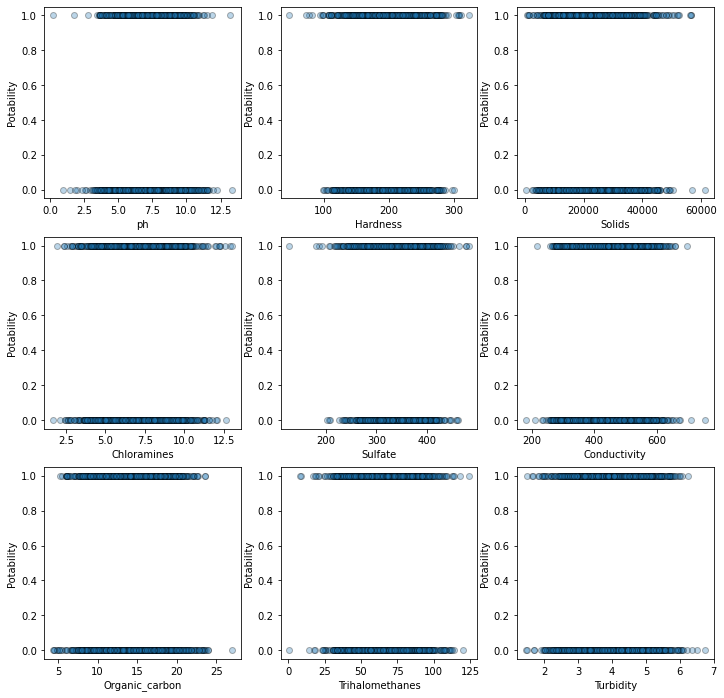

In [17]:
fig, axs = plt.subplots(3, 3, figsize = (12,12))

sns.scatterplot(ax = axs[0, 0], x='ph', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[0, 1], x='Hardness', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[0, 2], x='Solids', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[1, 0], x='Chloramines', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[1, 1], x='Sulfate', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[1, 2], x='Conductivity', y='Potability', data=water,
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[2, 0], x='Organic_carbon', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[2, 1], x='Trihalomethanes', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[2, 2], x='Turbidity', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")


In [14]:
water['Drinkable'] = water['Potability']

In [15]:
water['Drinkable'].replace({0: 'No', 1:'Yes'}, inplace = True)

<AxesSubplot:xlabel='Turbidity', ylabel='Drinkable'>

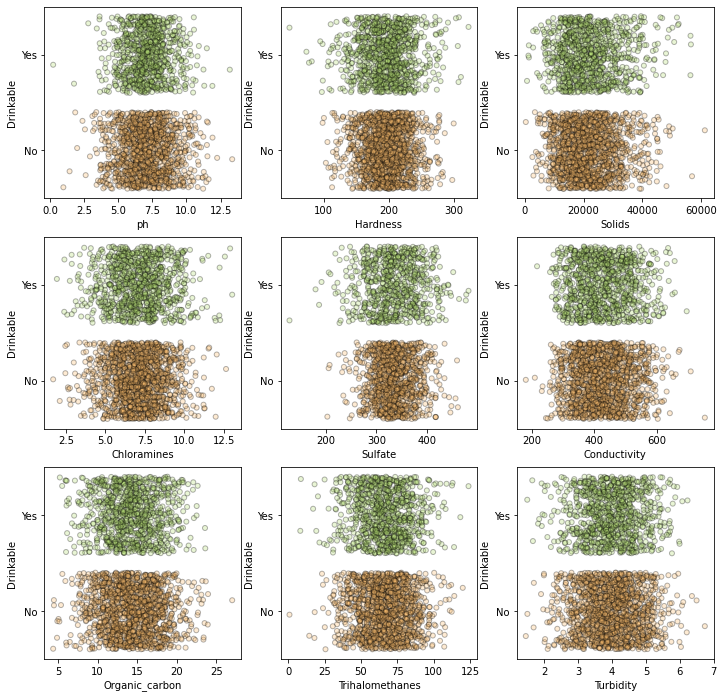

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 3, figsize = (12,12))

sns.stripplot(ax = axs[0, 0], x='ph', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[0, 1], x='Hardness', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[0, 2], x='Solids', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[1, 0], x='Chloramines', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[1, 1], x='Sulfate', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[1, 2], x='Conductivity', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[2, 0], x='Organic_carbon', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[2, 1], x='Trihalomethanes', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[2, 2], x='Turbidity', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")



# 4. Determine imputer-type for ph, sulfate and trihalomethanes

In [18]:
water['ph'].mean()

7.081347850044675

In [19]:
water['ph'].median()

7.031761612177099

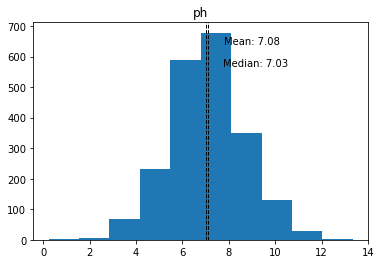

In [21]:
plt.hist(water['ph'].dropna())
plt.axvline(water['ph'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(water['ph'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(water['ph'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(water['ph'].mean()))
plt.text(water['ph'].median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(water['ph'].median()))
plt.title('ph')
plt.show()

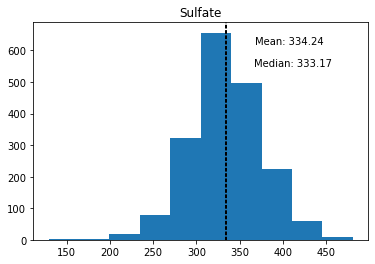

In [22]:
plt.hist(water['Sulfate'].dropna())
plt.axvline(water['Sulfate'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(water['Sulfate'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(water['Sulfate'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(water['Sulfate'].mean()))
plt.text(water['Sulfate'].median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(water['Sulfate'].median()))
plt.title('Sulfate')
plt.show()

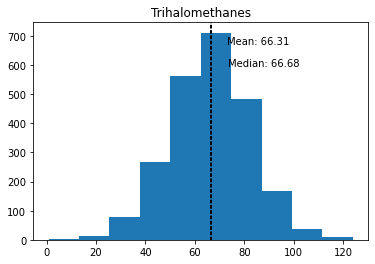

In [23]:
plt.hist(water['Trihalomethanes'].dropna())
plt.axvline(water['Trihalomethanes'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(water['Trihalomethanes'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(water['Trihalomethanes'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(water['Trihalomethanes'].mean()))
plt.text(water['Trihalomethanes'].median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(water['Trihalomethanes'].median()))
plt.title('Trihalomethanes')
plt.show()

# 5. Should we use 'is missing' columns?

In [24]:
water.groupby('Potability').count()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
Potability,,,,,,,,,,
0,1262,1498,1498,1498,1129,1498,1498,1410,1498,1498
1,826,959,959,959,737,959,959,920,959,959


In [25]:
Percentage_Drinkable = 959/(1498+959)
Percentage_Drinkable

0.3903133903133903

In [26]:
water.groupby(['ph', 'Potability'], dropna=False).count().sort_values('ph')

,,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
ph,Potability,,,,,,,,,
0.227499,1,1,1,1,1,1,1,1,1,1
0.975578,0,1,1,1,1,1,1,0,1,1
1.431782,0,1,1,1,1,1,1,1,1,1
1.757037,1,1,1,1,1,1,1,1,1,1
1.844538,0,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
12.246928,0,1,1,1,1,1,1,1,1,1
13.175402,1,1,1,1,1,1,1,0,1,1
13.349889,0,1,1,1,1,1,1,1,1,1


In [27]:
Percentage_Drinkable = 133/(133+236)
Percentage_Drinkable

0.3604336043360434

In [28]:
water.groupby(['Trihalomethanes', 'Potability'], dropna=False).count().sort_values('ph')


,,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Drinkable
Trihalomethanes,Potability,,,,,,,,,
70.852672,0,0,1,1,1,1,1,1,1,1
85.381682,1,0,1,1,1,1,1,1,1,1
85.428785,1,0,1,1,1,0,1,1,1,1
71.704595,0,0,1,1,1,1,1,1,1,1
48.384960,0,0,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
61.146087,1,1,1,1,1,1,1,1,1,1
61.205470,1,1,1,1,1,1,1,1,1,1
61.122644,0,1,1,1,1,1,1,1,1,1


In [29]:
Percentage_Drinkable = 39/(39+88)
Percentage_Drinkable

0.30708661417322836

In [30]:
water.groupby(['Sulfate', 'Potability'], dropna=False).count().sort_values('ph')


,,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
Sulfate,Potability,,,,,,,,,
283.755824,1,0,1,1,1,1,1,1,1,1
343.635821,0,0,1,1,1,1,1,1,1,1
320.449328,0,0,1,1,1,1,1,1,1,1
384.943779,0,0,1,1,1,1,1,0,1,1
290.311034,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
319.477187,1,1,1,1,1,1,1,1,1,1
319.463491,0,1,1,1,1,1,1,1,1,1
320.260120,0,1,1,1,1,1,1,1,1,1


In [31]:
Percentage_Drinkable = 222/(222+369)
Percentage_Drinkable

0.3756345177664975

In [32]:
import numpy as np

x = water['ph']
condlist = [x == 'NaN', x != 'NaN']
choicelist = [1, 0]
water['ph_missing'] = np.select(condlist, choicelist)

y = water['Sulfate']
condlist = [y == 'NaN', y != 'NaN']
choicelist = [1, 0]
water['Sulfate_missing'] = np.select(condlist, choicelist)

z = water['Trihalomethanes']
condlist = [z == 'NaN', z != 'NaN']
choicelist = [1, 0]
water['Trihalomethanes_missing'] = np.select(condlist, choicelist)

# 6. Run Imputer

In [33]:
water = water.drop(columns = 'Drinkable')

In [34]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.NaN, strategy = 'mean')
water_imputed =pd.DataFrame(imp.fit_transform(water))
water_imputed.columns=water.columns
water_imputed.index=water.index

In [36]:
water_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 2118 to 1207
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ph                       2457 non-null   float64
 1   Hardness                 2457 non-null   float64
 2   Solids                   2457 non-null   float64
 3   Chloramines              2457 non-null   float64
 4   Sulfate                  2457 non-null   float64
 5   Conductivity             2457 non-null   float64
 6   Organic_carbon           2457 non-null   float64
 7   Trihalomethanes          2457 non-null   float64
 8   Turbidity                2457 non-null   float64
 9   Potability               2457 non-null   float64
 10  ph_missing               2457 non-null   float64
 11  Sulfate_missing          2457 non-null   float64
 12  Trihalomethanes_missing  2457 non-null   float64
dtypes: float64(13)
memory usage: 348.7 KB


# 7. Train-test split

In [37]:
features = water_imputed.drop(columns = ['Potability']).columns
X = water_imputed[features]

target = water_imputed['Potability']
y = target

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

# 8. Models

## Model 1: Simple Logistic Regression

C:\Users\clare\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.58      0.51      0.54       375
         1.0       0.36      0.42      0.39       240

    accuracy                           0.48       615
   macro avg       0.47      0.47      0.47       615
weighted avg       0.49      0.48      0.48       615



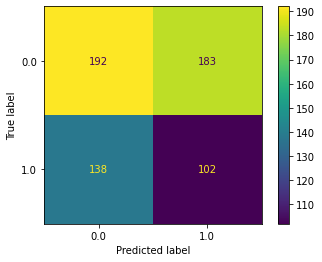

In [39]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state = 42, class_weight= 'balanced')
log_model.fit(X_train, y_train)

y_test_pred = log_model.predict(X_test)

from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(log_model, X_test, y_test)
print(classification_report(y_test, y_test_pred))

## Model 2: Simple Decision tree

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.74       375
         1.0       0.54      0.26      0.35       240

    accuracy                           0.62       615
   macro avg       0.59      0.56      0.54       615
weighted avg       0.60      0.62      0.59       615



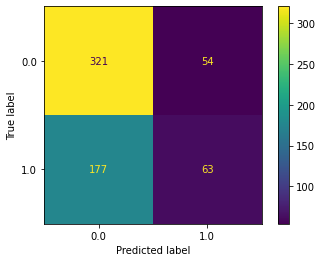

In [40]:
from sklearn.tree import DecisionTreeClassifier

water_dt = DecisionTreeClassifier(random_state = 42, max_depth = 5)
water_dt.fit(X_train, y_train)

y_test_pred = water_dt.predict(X_test)

plot_confusion_matrix(water_dt, X_test, y_test)
print(classification_report(y_test, y_test_pred))

## Model 3: KNN

              precision    recall  f1-score   support

         0.0       0.65      0.90      0.76       375
         1.0       0.62      0.25      0.36       240

    accuracy                           0.65       615
   macro avg       0.64      0.58      0.56       615
weighted avg       0.64      0.65      0.60       615



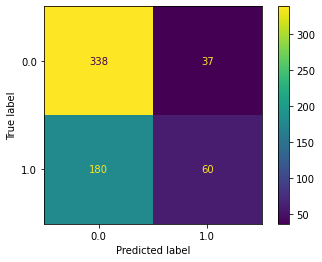

In [47]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

water_knn = KNeighborsClassifier(n_neighbors=10, p =1)

water_knn.fit(X_train_scaled, y_train)

y_knn_pred_test = water_knn.predict(X_test_scaled)

print(classification_report(y_test, y_knn_pred_test))
plot_confusion_matrix(water_knn, X_test_scaled, y_test)

## Add Polynomial Features (Degree 2)

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
poly_water = poly.fit_transform(X)

water_columns = poly.get_feature_names(X.columns)
poly_water = pd.DataFrame(poly_water, columns=water_columns)


### Resplit for polynomials

In [49]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(poly_water, y, random_state=42, test_size=0.25)

## Add Polynomial Features (Degree 3)

### Wasn't useful

In [50]:
#from sklearn.preprocessing import PolynomialFeatures

#poly=PolynomialFeatures(degree=3)
#poly_water = poly.fit_transform(X)
#water_columns = poly.get_feature_names(X.columns)
#poly_water = pd.DataFrame(poly_water, columns=water_columns)
#poly_water.head()

In [51]:
#X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(poly_water, y, random_state=42, test_size=0.25)

## Model 4: Logistic Regression w/ Polynomial features and Standard Scaler

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.68       380
         1.0       0.49      0.55      0.52       235

    accuracy                           0.61       615
   macro avg       0.60      0.60      0.60       615
weighted avg       0.62      0.61      0.62       615



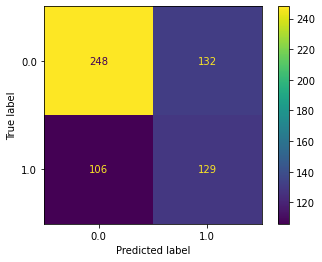

In [52]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_poly_train)
X_test_scaled = scaler.transform(X_poly_test)

lm_water = LogisticRegression(max_iter=500, random_state = 42, class_weight = 'balanced')
lm_water.fit(X_train_scaled, y_poly_train)

y_lm_pred_test = lm_water.predict(X_test_scaled)

print(classification_report(y_poly_test, y_lm_pred_test))
plot_confusion_matrix(lm_water, X_test_scaled, y_poly_test)

## Models 5, 6: Decision Tree w/ Polynomial Features and Grid Search

### Before Grid Search

              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66       380
         1.0       0.44      0.42      0.43       235

    accuracy                           0.57       615
   macro avg       0.54      0.54      0.54       615
weighted avg       0.57      0.57      0.57       615



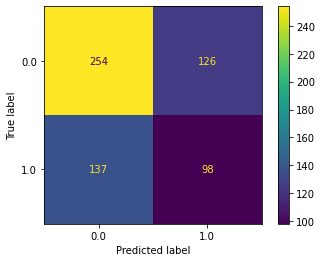

In [53]:
water_dt_poly = DecisionTreeClassifier(max_depth=100, min_samples_leaf=4, random_state=42)
water_dt_poly.fit(X_poly_train, y_poly_train)

y_pred_test = water_dt_poly.predict(X_poly_test)

print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(water_dt_poly, X_poly_test, y_poly_test)

### Implement Grid Search

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:    7.9s finished


0.2624203587411225
{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 6}
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=6,
                       random_state=42)
              precision    recall  f1-score   support

         0.0       0.63      0.92      0.75       380
         1.0       0.52      0.14      0.23       235

    accuracy                           0.62       615
   macro avg       0.57      0.53      0.49       615
weighted avg       0.59      0.62      0.55       615



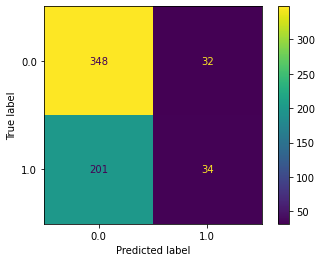

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,2,3,4,5], 'max_leaf_nodes':[3,4,5,6,7], 'min_samples_leaf': [6,7,8,9,10,12,15]}
grid_tree=GridSearchCV(water_dt_poly, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

grid_tree.fit(X_poly_train, y_poly_train)

print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

plot_confusion_matrix(grid_tree, X_poly_test, y_poly_test)

print(classification_report(y_poly_test, grid_tree.predict(X_poly_test)))

In [55]:
water_dt_gridsearched = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, random_state=42)

## Model 7: Random Forest

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.0min finished


0.6636257366965863
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 600}
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, n_estimators=600)
              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77       380
         1.0       0.64      0.31      0.42       235

    accuracy                           0.67       615
   macro avg       0.66      0.60      0.60       615
weighted avg       0.66      0.67      0.64       615



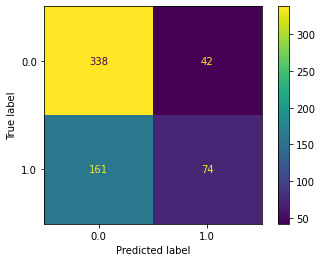

In [56]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators" : [400, 500, 600],
    "max_depth": [30, 35,45],
    "criterion": ["gini", "entropy"],
     "class_weight": ["balanced"]
#     "min_samples_leaf" : range(3,10),
#     "max_features": [2,4,None]
    }

gs=GridSearchCV(RandomForestClassifier(), grid, cv=5, scoring="precision", n_jobs=-1, verbose=1)

gs.fit(X_poly_train, y_poly_train)

y_test_pred=gs.predict(X_poly_test)


# Single best score achieved across all params (min_samples_split)
print(gs.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs.best_estimator_)

#Identify the best score during fitting with cross-validation
print(classification_report(y_poly_test, y_test_pred))
plot_confusion_matrix(gs, X_poly_test, y_poly_test)

In [57]:
randomforest_gridsearched = RandomForestClassifier(class_weight='balanced', max_depth=45, n_estimators=600, random_state=42)

## Model 8: Single Feature (ph)

In [58]:
X1 = water_imputed['ph']
y1 = water_imputed['Potability']

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42, test_size=0.25)

X_train1 = X_train1.values.reshape(-1,1)
X_test1 = X_test1.values.reshape(-1,1)

scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# dt = DecisionTreeClassifier(max_depth=5)
# dt.fit(X_train_scaled, y_train)

lm = LogisticRegression(random_state=42, class_weight = 'balanced')

lm.fit(X_train_scaled1, y_train1)

LogisticRegression(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

         0.0       0.66      0.43      0.52       380
         1.0       0.41      0.64      0.50       235

    accuracy                           0.51       615
   macro avg       0.53      0.53      0.51       615
weighted avg       0.56      0.51      0.51       615



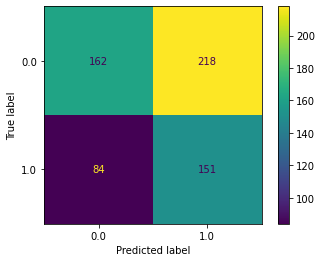

In [60]:
y_test_pred1 = lm.predict(X_test_scaled1)

print(classification_report(y_test1, y_test_pred1))
plot_confusion_matrix(lm, X_test_scaled1, y_test1)

## Model 9: Five Features

              precision    recall  f1-score   support

         0.0       0.61      0.51      0.55       380
         1.0       0.37      0.47      0.42       235

    accuracy                           0.49       615
   macro avg       0.49      0.49      0.48       615
weighted avg       0.52      0.49      0.50       615



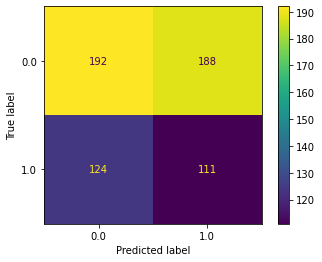

In [61]:
columns=["ph", "Sulfate", "Chloramines", "Turbidity", "Conductivity"]
X2=water_imputed[columns]
y2=water_imputed['Potability']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, test_size=0.25)

# X_train=X_train.values.reshape(-1,1)
# X_test=X_test.values.reshape(-1,1)

scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# dt = DecisionTreeClassifier(max_depth=5)
# dt.fit(X_train_scaled, y_train)

lm = LogisticRegression(random_state=42, class_weight = 'balanced')
lm.fit(X_train_scaled2, y_train2)

y_test_pred = lm.predict(X_test_scaled2)

print(classification_report(y_test2, y_test_pred))
plot_confusion_matrix(lm, X_test_scaled2, y_test2)

## Models 10, 11: Gradient Boosting Classifier

### Before Grid Search

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75       380
         1.0       0.58      0.42      0.48       235

    accuracy                           0.66       615
   macro avg       0.63      0.61      0.62       615
weighted avg       0.65      0.66      0.65       615



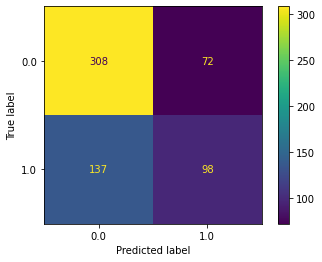

In [62]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42, learning_rate = 0.11, max_depth = 6, n_estimators = 270)

gbc.fit(X_poly_train, y_poly_train)

y_pred_test = gbc.predict(X_poly_test)


print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(gbc, X_poly_test, y_poly_test)

### Implement Grid Search

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.0min finished


0.6094053464266229
{'learning_rate': 0.09, 'max_depth': 7, 'n_estimators': 260}
GradientBoostingClassifier(learning_rate=0.09, max_depth=7, n_estimators=260,
                           random_state=42)
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       380
         1.0       0.58      0.43      0.49       235

    accuracy                           0.66       615
   macro avg       0.64      0.62      0.62       615
weighted avg       0.65      0.66      0.65       615



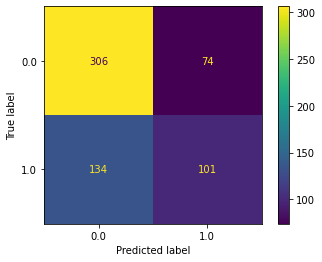

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate':[0.08,0.085,0.09,0.1], 'max_depth':[6,7,8,9], 'n_estimators': [260,270,280]}

grid_tree=GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)

grid_tree.fit(X_poly_train, y_poly_train)


print(grid_tree.best_score_)
print(grid_tree.best_params_)                             
print(grid_tree.best_estimator_)

print(classification_report(y_poly_test, grid_tree.predict(X_poly_test)))
plot_confusion_matrix(grid_tree, X_poly_test, y_poly_test)

## Models 12, 13: AdaBoost

### On grid-searched Decision tree

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70       380
         1.0       0.51      0.46      0.49       235

    accuracy                           0.62       615
   macro avg       0.60      0.59      0.59       615
weighted avg       0.62      0.62      0.62       615



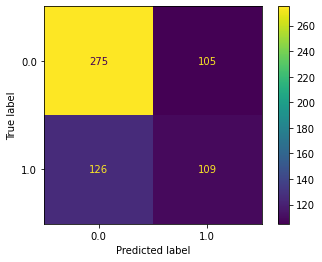

In [64]:
abc = AdaBoostClassifier(water_dt_gridsearched, random_state=42)

abc.fit(X_poly_train, y_poly_train)

y_pred_test = abc.predict(X_poly_test)

print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(abc, X_poly_test, y_poly_test)

### On grid-searched Random Forest

              precision    recall  f1-score   support

         0.0       0.68      0.90      0.77       380
         1.0       0.65      0.31      0.42       235

    accuracy                           0.67       615
   macro avg       0.67      0.60      0.60       615
weighted avg       0.67      0.67      0.64       615



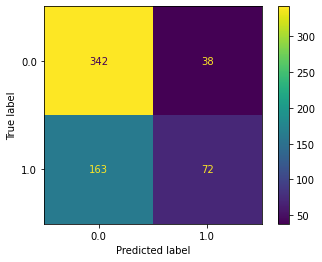

In [65]:
abc = AdaBoostClassifier(randomforest_gridsearched, random_state=42)

abc.fit(X_poly_train, y_poly_train)

y_pred_test = abc.predict(X_poly_test)

print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(abc, X_poly_test, y_poly_test)

## Model 14: Bagging the Polynomial Decision Tree

In [66]:
from sklearn.ensemble import BaggingClassifier

              precision    recall  f1-score   support

         0.0       0.64      0.94      0.76       380
         1.0       0.61      0.14      0.23       235

    accuracy                           0.64       615
   macro avg       0.63      0.54      0.50       615
weighted avg       0.63      0.64      0.56       615



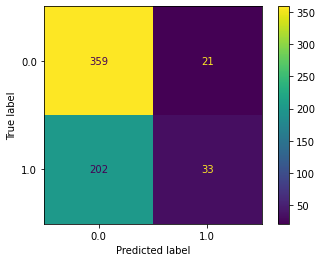

In [67]:
bc_dtc = BaggingClassifier(
            base_estimator=water_dt_gridsearched, 
            n_estimators= 250,
            max_samples= 0.75,
            max_features= 0.8,
            oob_score= True
                )

bc_dtc.fit(X_poly_train, y_poly_train)
y_pred_test = bc_dtc.predict(X_poly_test)

print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(bc_dtc, X_poly_test, y_poly_test)

# 9. Performance of Classifiers on ph and Chloramines, Sulfate

### Looking at the interaction of any two features (plus the target denoted by colour), we can see that there may be a rule for ph and Sulfate, or ph and Chloramines.

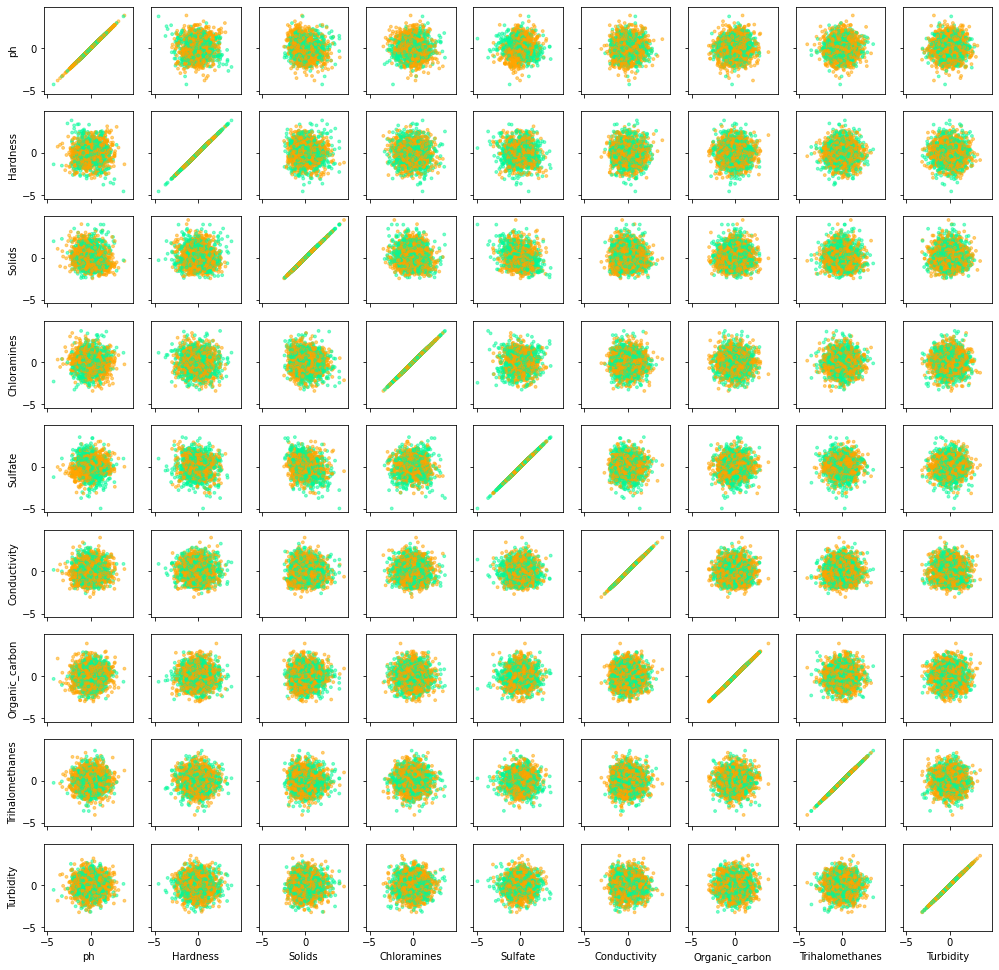

In [13]:
import matplotlib.pyplot as plt

dataset = water.copy()

features = ['ph', 'Hardness', 'Solids', 'Chloramines','Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for feature in features:
    dataset[feature] = (dataset[feature] - dataset[feature].mean())/(dataset[feature].std())

fig, axs = plt.subplots(9, 9, figsize = (17,17), sharex = True, sharey = True)

colors = {0:'orange', 1:'mediumspringgreen'}

for a in range(0,9,1):
    for b in range(0,9,1):
        axs[a, b].scatter(dataset[features[b]], dataset[features[a]], c=dataset['Potability'].map(colors), alpha = 0.5, s = 8)
        if a == len(features) - 1:
            axs[a, b].set_xlabel(features[b])
        if b == 0:
            axs[a, b].set_ylabel(features[a])  
          

### Look closer at these plots. 

Text(0, 0.5, 'Chloramines (train)')

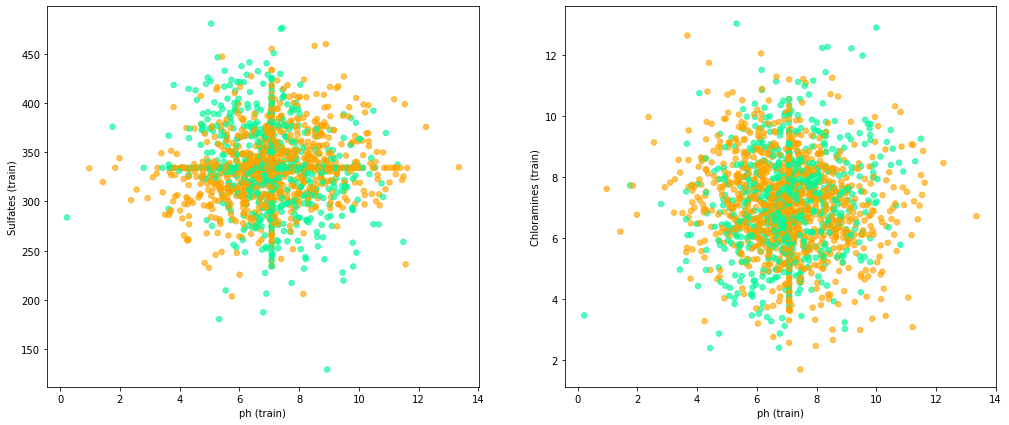

In [90]:
features = ['ph', 'Chloramines','Sulfate']

fig, axs = plt.subplots(1, 2, figsize = (17,7))

colors = {0:'orange', 1:'mediumspringgreen'}

axs[0].scatter(X_train['ph'], X_train['Sulfate'], c = y_train.map(colors), alpha = 0.65, s = 30)
axs[0].set_xlabel('ph (train)')
axs[0].set_ylabel('Sulfates (train)')

axs[1].scatter(X_train['ph'], X_train['Chloramines'], c = y_train.map(colors), alpha = 0.65, s = 30)
axs[1].set_xlabel('ph (train)')
axs[1].set_ylabel('Chloramines (train)')

#for a in range(0,9,1):
#    for b in range(0,9,1):
#        axs[a, b].scatter(dataset[features[b]], dataset[features[a]], c=dataset['Potability'].map(colors), alpha = 0.5, s = 0.75)
#        if a == len(features) - 1:
#            axs[a, b].set_xlabel(features[b])
#        if b == 0:
#            axs[a, b].set_ylabel(features[a])    
        

### Examine performance of various classifiers on ph and Sulfate, ph and Chloramines

Automatically created module for IPython interactive environment


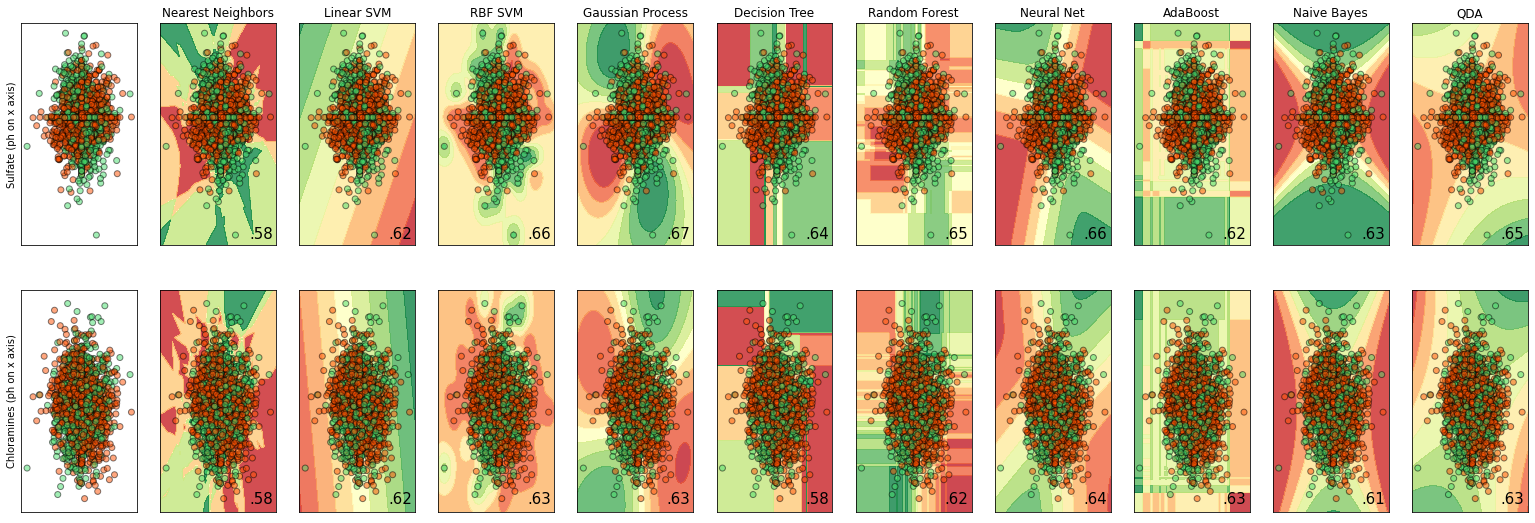

In [91]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller

# License: BSD 3 clause


from matplotlib.colors import ListedColormap

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

datasets = [water_imputed[['ph', 'Sulfate']], water_imputed[['ph', 'Chloramines']]]

figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
for a, ds in enumerate(datasets):
  
    # preprocess dataset, split into training and test part
    X, y = ds, target
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

    #x is ph, y is Sulfate and then Chloramines
    #set grid size 0.5 bigger on each end than range of data
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    #set up meshgrid of this size in increment h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdYlGn
    cm_bright = ListedColormap(['#FF5100', '#47de6d'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', alpha = 0.5)
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if a == 0:
        ax.set_ylabel('Sulfate (ph on x axis)')
    if a != 0:
        ax.set_ylabel('Chloramines (ph on x axis)')
    i += 1
    
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', alpha = 0.5)
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.5)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        if i < 12:
            ax.set_title(name)
            
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

        
        i += 1



plt.show()



### The gaussian classifier has the highest score on these, so we gave it a try below, but it did not out-perform the random forest. 

## Bonus Model 15: Gaussian Process Classifier

In [73]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [74]:
columns=["ph", "Sulfate", "Chloramines"]
X=water_imputed[columns]
y=water_imputed.Potability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

              precision    recall  f1-score   support

         0.0       0.64      0.96      0.77       380
         1.0       0.64      0.13      0.21       235

    accuracy                           0.64       615
   macro avg       0.64      0.54      0.49       615
weighted avg       0.64      0.64      0.55       615



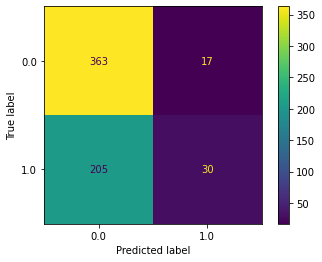

In [75]:
kernel=1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel, random_state=42, max_iter_predict=1000)

gpc.fit(X_train, y_train)

y_test_pred=gpc.predict(X_test)

print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(gpc, X_test, y_test)

# 10. Visually Examining ph, Sulfate and Chloramines

### Examine interaction of all three

In [76]:
from mpl_toolkits import mplot3d

In [77]:
potable = water_imputed[water_imputed['Potability'] == 1]
impotable = water_imputed[water_imputed['Potability'] == 0]

In [78]:
drinkable_max_chl = potable[potable['Chloramines'] == potable['Chloramines'].max()]
undrinkable_max_chl = impotable[impotable['Chloramines'] == impotable['Chloramines'].max()]
drinkable_max_ph = potable[potable['ph'] == potable['ph'].max()]
undrinkable_max_ph = impotable[impotable['ph'] == impotable['ph'].max()]
drinkable_max_sul = potable[potable['Sulfate'] == potable['Sulfate'].max()]
undrinkable_max_sul = impotable[impotable['Sulfate'] == impotable['Sulfate'].max()]

drinkable_min_chl = potable[potable['Chloramines'] == potable['Chloramines'].min()]
undrinkable_min_chl = impotable[impotable['Chloramines'] == impotable['Chloramines'].min()]
drinkable_min_ph = potable[potable['ph'] == potable['ph'].min()]
undrinkable_min_ph = impotable[impotable['ph'] == impotable['ph'].min()]
drinkable_min_sul = potable[potable['Sulfate'] == potable['Sulfate'].min()]
undrinkable_min_sul = impotable[impotable['Sulfate'] == impotable['Sulfate'].min()]

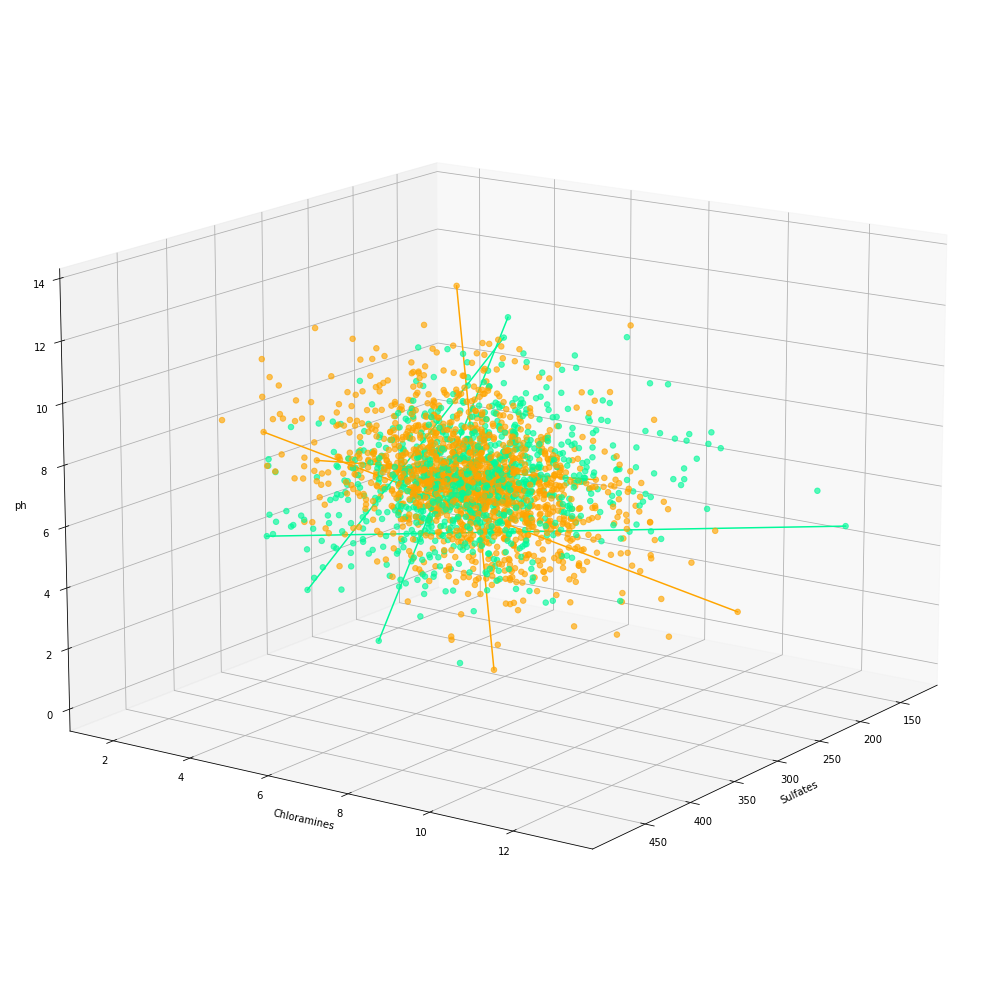

In [79]:
fig = plt.figure(figsize = (18,18))
ax = plt.axes(projection='3d')

colors = {0:'orange', 1:'mediumspringgreen'}

xdata = water_imputed['Sulfate']
zdata = water_imputed['ph']
ydata = water_imputed['Chloramines']

ax.set_xlabel('Sulfates')
ax.set_ylabel('Chloramines')
ax.set_zlabel('ph')

ax.scatter3D(xdata, ydata, zdata, alpha = 0.65, c=dataset['Potability'].map(colors),s=30)

xdata = water_imputed['Sulfate']
zdata = water_imputed['ph']
ydata = water_imputed['Chloramines']

ax.plot3D([undrinkable_max_chl['Sulfate'].max(), undrinkable_min_chl['Sulfate'].max()], 
          [undrinkable_max_chl['Chloramines'].max(), undrinkable_min_chl['Chloramines'].max()], 
          [undrinkable_max_chl['ph'].max(), undrinkable_min_chl['ph'].max()], 
          'orange') # not drinkable chl extremes
ax.plot3D([drinkable_max_chl['Sulfate'].max(), drinkable_min_chl['Sulfate'].max()], 
          [drinkable_max_chl['Chloramines'].max(), drinkable_min_chl['Chloramines'].max()], 
          [drinkable_max_chl['ph'].max(), drinkable_min_chl['ph'].max()], 
          'mediumspringgreen') # drinkable chl extremes
ax.plot3D([undrinkable_max_ph['Sulfate'].max(), undrinkable_min_ph['Sulfate'].max()], 
          [undrinkable_max_ph['Chloramines'].max(), undrinkable_min_ph['Chloramines'].max()], 
          [undrinkable_max_ph['ph'].max(), undrinkable_min_ph['ph'].max()], 
          'orange') # not drinkable ph extremes
ax.plot3D([drinkable_max_ph['Sulfate'].max(), drinkable_min_ph['Sulfate'].max()], 
          [drinkable_max_ph['Chloramines'].max(), drinkable_min_ph['Chloramines'].max()], 
          [drinkable_max_ph['ph'].max(), drinkable_min_ph['ph'].max()], 
          'mediumspringgreen') # drinkable ph extremes
ax.plot3D([undrinkable_max_sul['Sulfate'].max(), undrinkable_min_sul['Sulfate'].max()], 
          [undrinkable_max_sul['Chloramines'].max(), undrinkable_min_sul['Chloramines'].max()], 
          [undrinkable_max_sul['ph'].max(), undrinkable_min_sul['ph'].max()], 
          'orange') # not drinkable ph extremes
ax.plot3D([drinkable_max_sul['Sulfate'].max(), drinkable_min_sul['Sulfate'].max()], 
          [drinkable_max_sul['Chloramines'].max(), drinkable_min_sul['Chloramines'].max()], 
          [drinkable_max_sul['ph'].max(), drinkable_min_sul['ph'].max()], 
          'mediumspringgreen') # drinkable ph extremes

#ax.spines['bottom'].set_color('white')
#ax.spines['top'].set_color('white')
#ax.spines['left'].set_color('white')
#ax.spines['right'].set_color('white')
#ax.set_facecolor('#044559')
#ax.xaxis.label.set_color('white')
#ax.yaxis.label.set_color('white')
#ax.zaxis.label.set_color('white')

ax.view_init(15,35)


#ax.xaxis.pane.fill = False
#ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False

#ax.xaxis.pane.set_edgecolor('white')
#ax.yaxis.pane.set_edgecolor('white')
#ax.zaxis.pane.set_edgecolor('white')

#ax.tick_params(axis = 'x', colors='white')
#ax.tick_params(axis = 'y', colors='white')
#ax.tick_params(axis = 'z', colors='white')





# 11. Define and Inspect Business Rule for ph and Sulfate

In [80]:
# if product of z-scores is positive (1st or 3rd quadrant), then impotable, otherwise potable

water_imputed['ph_scaled'] = (water_imputed['ph']-water_imputed['ph'].mean())/water_imputed['ph'].std()
water_imputed['sul_scaled'] = (water_imputed['Sulfate']-water_imputed['Sulfate'].mean())/water_imputed['Sulfate'].std()
water_imputed['prod_ph_sul_scaled'] = water_imputed['sul_scaled'] * water_imputed['ph_scaled']

x = water_imputed['prod_ph_sul_scaled']
condlist = [x < 0, x >= 0]
choicelist = [1, 0]
water_imputed['bus_rule_pot'] = np.select(condlist, choicelist)

print(classification_report(water_imputed['Potability'], water_imputed['bus_rule_pot'] ))

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      1498
         1.0       0.48      0.45      0.46       959

    accuracy                           0.59      2457
   macro avg       0.57      0.57      0.57      2457
weighted avg       0.59      0.59      0.59      2457



In [81]:
# if product of z-scores is positive (1st or 3rd quadrant), then potable, otherwise impotable

water_imputed['chlo_scaled'] = (water_imputed['Chloramines'] - water_imputed['Chloramines'].mean())/water_imputed['Chloramines'].std()
water_imputed['prod_ph_chlo_scaled'] = water_imputed['chlo_scaled'] * water_imputed['ph_scaled']

x = water_imputed['prod_ph_chlo_scaled']
condlist = [x <= 0, x > 0]
choicelist = [0, 1]
water_imputed['bus_rule_pot_2'] = np.select(condlist, choicelist)

print(classification_report(water_imputed['Potability'], water_imputed['bus_rule_pot_2'] ))

              precision    recall  f1-score   support

         0.0       0.66      0.54      0.59      1498
         1.0       0.44      0.57      0.50       959

    accuracy                           0.55      2457
   macro avg       0.55      0.55      0.54      2457
weighted avg       0.57      0.55      0.55      2457



### Neither of these out-perform guessing zero for everything. 

# 12. Visually Examining Turbidity, Trihalomethanes and Chloramines - three features the EPA deems 'primary' indicators of water potability

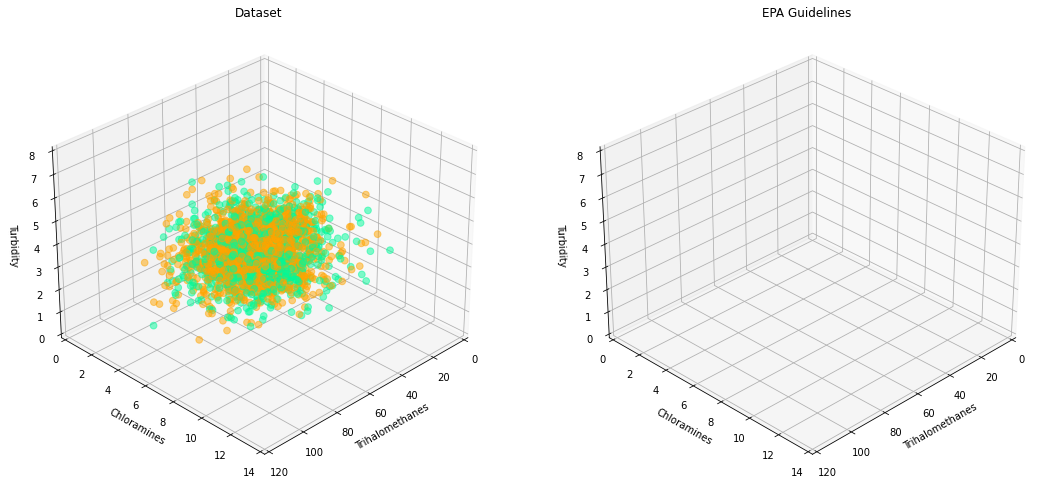

In [82]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(18,11))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')


#fig.patch.set_facecolor('#044559')

colors = {0:'orange', 1:'mediumspringgreen'}

zdata = water_imputed['Turbidity']
xdata = water_imputed['Trihalomethanes']
ydata = water_imputed['Chloramines']
ax.set_xlabel('Trihalomethanes')
ax.set_ylabel('Chloramines')
ax.set_zlabel('Turbidity')
ax.scatter3D(xdata, ydata, zdata, alpha = 0.5, c=dataset['Potability'].map(colors),s=45)

ax.set_xlim(0,120)
ax.set_ylim(0,14)
ax.set_zlim(0,8)

ax.set_title("Dataset")

ax.view_init(30, 45)

#ax.set_facecolor('#044559')
#ax.xaxis.label.set_color('white')
#ax.yaxis.label.set_color('white')
#ax.zaxis.label.set_color('white')



#ax.xaxis.pane.fill = False
#ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False

#ax.xaxis.pane.set_edgecolor('white')
#ax.yaxis.pane.set_edgecolor('white')
#ax.zaxis.pane.set_edgecolor('white')

#ax.tick_params(axis = 'x', colors='white')
#ax.tick_params(axis = 'y', colors='white')
#ax.tick_params(axis = 'z', colors='white')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')


EPApotable = water_imputed[water_imputed['Turbidity'] <= 1]
EPApotable = EPApotable[EPApotable['Trihalomethanes'] <= 80]
EPApotable = EPApotable[EPApotable['Chloramines'] <= 4]

zdata = EPApotable['Turbidity']
xdata = EPApotable['Trihalomethanes']
ydata = EPApotable['Chloramines']
ax.set_xlabel('Trihalomethanes')
ax.set_ylabel('Chloramines')
ax.set_zlabel('Turbidity')
ax.scatter3D(xdata, ydata, zdata, alpha = 0.5, c=EPApotable['Potability'].map(colors),s=45)
ax.view_init(0, 45)

ax.set_xlim(0,120)
ax.set_ylim(0,14)
ax.set_zlim(0,8)

ax.set_title("EPA Guidelines")

ax.view_init(30, 45)

#ax.set_facecolor('#044559')
#ax.xaxis.label.set_color('white')
#ax.yaxis.label.set_color('white')
#ax.zaxis.label.set_color('white')




#ax.xaxis.pane.fill = False
#ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False

#ax.xaxis.pane.set_edgecolor('white')
#ax.yaxis.pane.set_edgecolor('white')
#ax.zaxis.pane.set_edgecolor('white')

#ax.tick_params(axis = 'x', colors='white')
#ax.tick_params(axis = 'y', colors='white')
#ax.tick_params(axis = 'z', colors='white')

plt.show()

# 13. Pickling for Holdout Data

In [94]:
grid = {
    'n_estimators' : [400, 500, 600],
    'max_depth': [30, 35,45],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
    }
gs_final=GridSearchCV(RandomForestClassifier(), grid, cv=5, scoring='precision', n_jobs=-1, verbose=1)
gs_final.fit(poly_water, water['Potability'])

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 35, 45],
                         'n_estimators': [400, 500, 600]},
             scoring='precision', verbose=1)

In [96]:
import pickle
pickle_out = open('Data/model.pickle','wb')
pickle.dump(gs_final, pickle_out)
pickle_out.close()

other_info = [poly_water]
pickle_out = open('Data/other.pickle','wb')
pickle.dump(other_info, pickle_out)
pickle_out.close()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/model.pickle'